Import

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Set up matplotlib figures

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

Load table

In [5]:
filepath = "Alexandria.csv"
sales_data = pd.read_csv(filepath)
print "loading from file"

loading from file


In [6]:
sales_data.head(3)

,ADDRESS,SALE PRICE,SALE DATE,AREA,STRATA/NON STRATA,MULTI-PROPERTY SALE (Y/N),PROPERTY NUMBER,DEALING NUMBER,EXTRACTION DATE
0,"34 ALEXANDER STREET, ALEXANDRIA NSW 2015",1285000,16 March 2016,88.53,NON STRATA,No,2106326,AK410905,23 April 2017
1,"34 ALEXANDER STREET, ALEXANDRIA NSW 2015",935000,27 September 2013,88.53,NON STRATA,No,2106326,AI144243,23 April 2017
2,"36 ALEXANDER STREET, ALEXANDRIA NSW 2015",885000,8 July 2013,88.50,NON STRATA,No,2106327,AI8960,23 April 2017


In [9]:
row_five = sales_data.iloc[2]
row_five['ADDRESS']

'36 ALEXANDER STREET, ALEXANDRIA NSW 2015'

In [7]:
sales_data["SALE DATE"][:3]

0        16 March 2016
1    27 September 2013
2          8 July 2013
Name: SALE DATE, dtype: object

In [8]:
sales_data["SALE PRICE"][:10]

0    1285000
1     935000
2     885000
3    1200000
4     795000
5     825000
6    1460000
7     952000
8     290000
9     248000
Name: SALE PRICE, dtype: int64

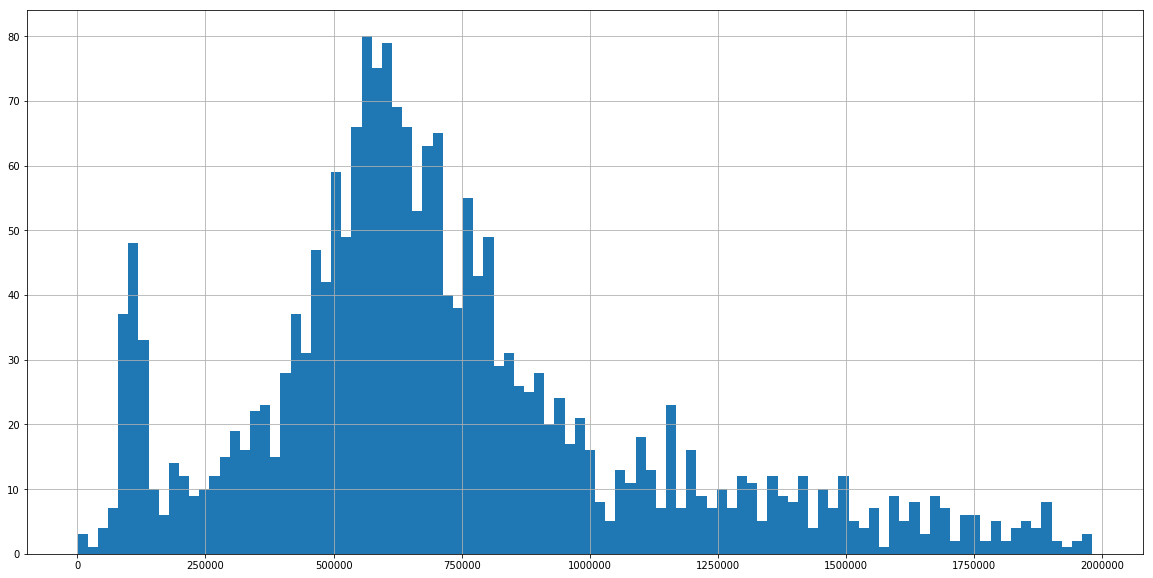

In [9]:
sales_data["SALE PRICE"][sales_data["SALE PRICE"] < 2000000].hist(bins=100)

## Strata status

In [10]:
data_list = sales_data["STRATA/NON STRATA"]
data_series = pd.Series(data_list)
non_strata_pattern = ["NON STRATA" in x for x in data_series]
strata_pattern = ["STRATA" in x for x in data_series]

non_strata_price = sales_data["SALE PRICE"][non_strata_pattern]
strata_price = sales_data["SALE PRICE"][strata_pattern]

### Plot strata vs Non Strata

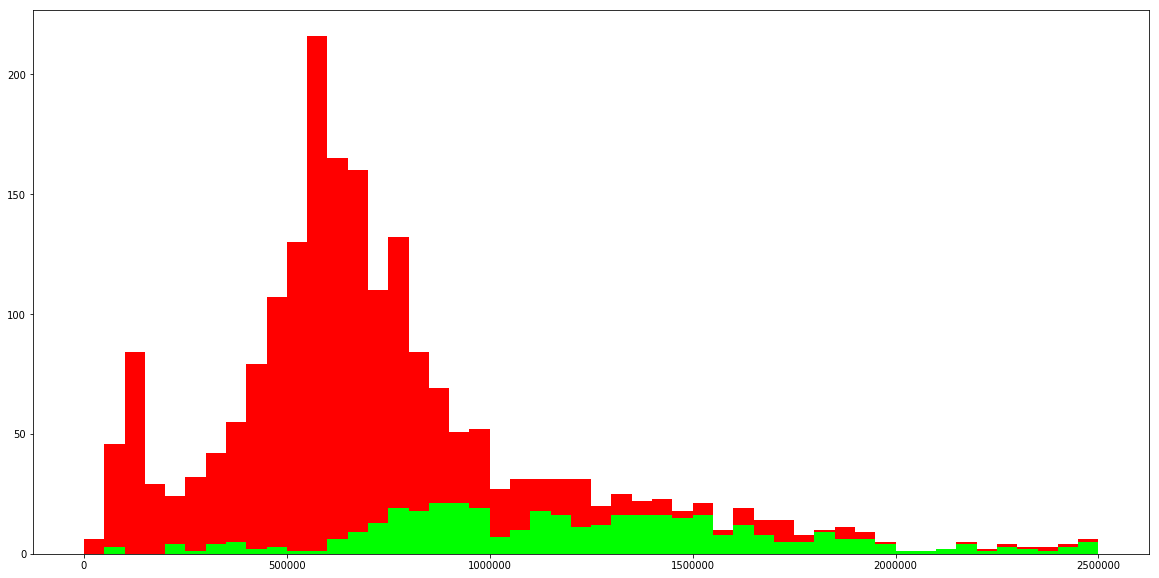

In [11]:
plt.hist(strata_price, bins=50, range=(0, 2500000), facecolor="#FF0000", alpha=1)
plt.hist(non_strata_price, bins=50, range=(0, 2500000), facecolor="#00FF00", alpha=1)
plt.show()

## Date information
Note the .drop_duplicates(subset=["string']) to remove the duplicate properties

In [12]:
sales_data = pd.read_csv(filepath,
                         infer_datetime_format=True,
                         parse_dates=["SALE DATE"],
                         dayfirst=True)

sales_data = sales_data.drop_duplicates(subset=["DEALING NUMBER"])

sales_data[110:125].head(10)

,ADDRESS,SALE PRICE,SALE DATE,AREA,STRATA/NON STRATA,MULTI-PROPERTY SALE (Y/N),PROPERTY NUMBER,DEALING NUMBER,EXTRACTION DATE
113,"74 BOTANY ROAD, ALEXANDRIA NSW 2015",5300000,2015-03-20,986.2,NON STRATA,No,2109595,AJ521496,23 April 2017
114,"84 BOTANY ROAD, ALEXANDRIA NSW 2015",4700000,2015-03-20,683.7,NON STRATA,No,2109596,AJ521481,23 April 2017
115,"134 BOTANY ROAD, ALEXANDRIA NSW 2015",2760000,2014-10-31,588.1,NON STRATA,No,2109603,AJ149475,23 April 2017
116,"146 BOTANY ROAD, ALEXANDRIA NSW 2015",3161450,2013-11-29,654.0,NON STRATA,Yes (2),2109608,AI441592,23 April 2017
117,"330 BOTANY ROAD, ALEXANDRIA NSW 2015",8500000,2012-07-03,1656.3,NON STRATA,Yes (2),2109643,AH182986,23 April 2017
119,"338 BOTANY ROAD, ALEXANDRIA NSW 2015",9702908,2012-07-31,5238.0,NON STRATA,No,2109645,AH232908,23 April 2017
120,"552 BOTANY ROAD, ALEXANDRIA NSW 2015",6187500,2016-04-21,834.7,NON STRATA,No,2109774,AK509170,23 April 2017
121,"556 BOTANY ROAD, ALEXANDRIA NSW 2015",6880000,2016-08-24,954.8,NON STRATA,No,2109775,AK950587,23 April 2017
122,"562 BOTANY ROAD, ALEXANDRIA NSW 2015",81075000,2016-07-10,2517.0,NON STRATA,Yes (11),2109777,AM180777,23 April 2017
123,"57/1 SHIRLEY STREET, ALEXANDRIA NSW 2015",845000,2016-12-06,0.0,STRATA,No,2993673,AM175877,23 April 2017


### Graph that

In [13]:
def get_month(x):
    return x["SALE DATE"].month

sales_data["SALE MONTH"] = sales_data.apply(get_month, axis=1)
sales_data.head(1)

,ADDRESS,SALE PRICE,SALE DATE,AREA,STRATA/NON STRATA,MULTI-PROPERTY SALE (Y/N),PROPERTY NUMBER,DEALING NUMBER,EXTRACTION DATE,SALE MONTH
0,"34 ALEXANDER STREET, ALEXANDRIA NSW 2015",1285000,2016-03-16,88.53,NON STRATA,No,2106326,AK410905,23 April 2017,3


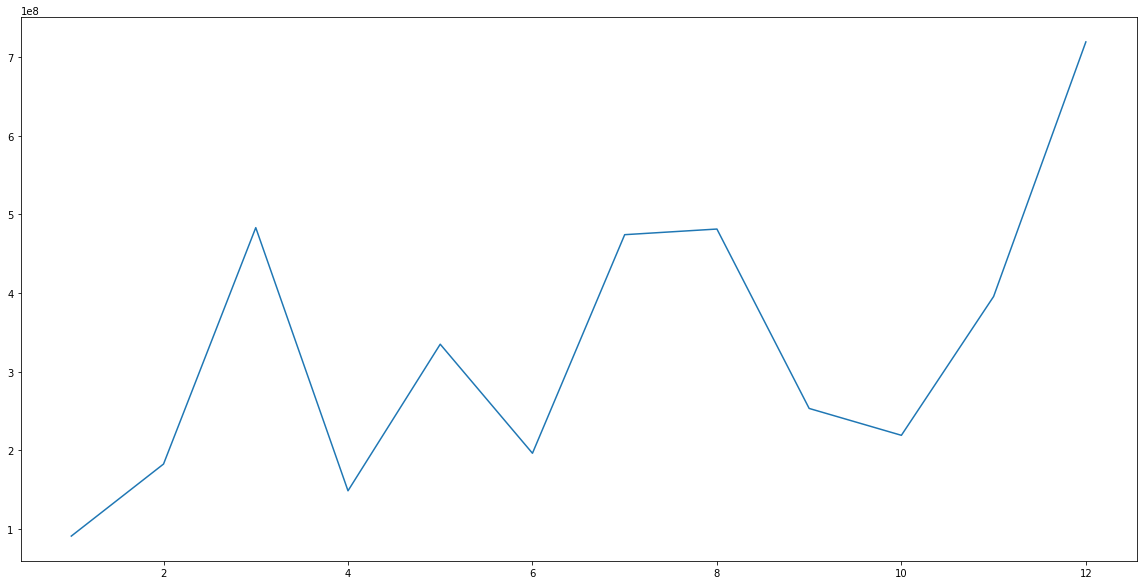

In [57]:
monthly_sales = sales_data[["SALE PRICE", "SALE MONTH"]].groupby("SALE MONTH").sum()
plt.plot(monthly_sales)
plt.show()